#  A53299801 - SIDDARTH MEENAKSHI SUNDARAM

In [15]:
import numpy as np
from matplotlib import pyplot
import MNISTtools

$ \textbf {Q1} $

In [16]:
#1 Loading dataset and checking shape of the training dataset

#help(MNISTtools.load)
#help(MNISTtools.show)
xtrain, ltrain = MNISTtools.load(dataset="training", path=None) 
print("Answer 1. Shape of xtrain is ", np.shape(xtrain))
print("          Shape of ltrain is ", np.shape(ltrain))
print("          Size of training dataset is ",xtrain.shape[1])
print("          Feature dimension is ",xtrain.shape[0])

Answer 1. Shape of xtrain is  (784, 60000)
          Shape of ltrain is  (60000,)
          Size of training dataset is  60000
          Feature dimension is  784


$ \textbf {Q2} $

Answer 2. Displaying image at index 42:


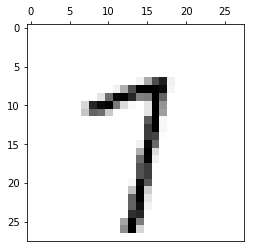

          Label of image is  7


In [17]:
#2 Displaying Image and corresponding label

print("Answer 2. Displaying image at index 42:")
MNISTtools.show(xtrain[:, 42])
print("          Label of image is ", ltrain[42])

$ \textbf {Q3} $

In [18]:
#3 Finding xtrain range and type

#xtrain_max = np.max(xtrain)
#xtrain_min = np.min(xtrain)
print("Answer 3. xtrain range is [", np.min(xtrain), ", ", np.max(xtrain), "]")
print("          xtrain type is ",type(xtrain))



Answer 3. xtrain range is [ 0 ,  255 ]
          xtrain type is  <class 'numpy.ndarray'>


$ \textbf {Q4} $

In [19]:
#4 Normalizing and Updating xtrain

xtrain = xtrain.astype(np.float32)
def normalize_MNIST_images(x):
    x = -1 + (2*x/255)
    return x 

In [20]:
#xtrain = (np.interp(xtrain, (np.min(xtrain), np.max(xtrain)), (-1, +1)))
xtrain = normalize_MNIST_images(xtrain)
print("Answer 4. Min of normalized xtrain", np.min(xtrain))
print("          Max of normalized xtrain", np.max(xtrain))
print("          Range of normalized xtrain is [", np.min(xtrain), ", ", np.max(xtrain), "]")

Answer 4. Min of normalized xtrain -1.0
          Max of normalized xtrain 1.0
          Range of normalized xtrain is [ -1.0 ,  1.0 ]


$ \textbf {Q5} $

In [21]:
#5 Converting label to one hot code.

def label2onehot(lbl):
    d = np.zeros((lbl.max() + 1, lbl.size))
    for i in range(lbl.max()):
        d[lbl, np.arange(lbl.size)] = 1
    return d
dtrain = label2onehot(ltrain)
print("Checking Shape of dtrain as ", np.shape(dtrain))
print("Answer 5. One hot code for index 42 is ", dtrain[:,42])
print("          Label for index 42 is ", ltrain[42])

Checking Shape of dtrain as  (10, 60000)
Answer 5. One hot code for index 42 is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
          Label for index 42 is  7


Note : We can see that One hot code of label at index 42 corresponds to value of label at index 42

$ \textbf {Q6} $

In [22]:
#6 Converting one hot code to label

def onehot2label(d):
    lbl = d.argmax(axis=0)
    return lbl

print("Comparing ltrain to onehot2label(dtrain)")
print("Answer 6.", set(onehot2label(dtrain))==set(ltrain))

Comparing ltrain to onehot2label(dtrain)
Answer 6. True


Note : In Set comparison, True means arrays are same 


$ \textbf {Q7} $

In [23]:
#7 
#Defining softmax function - An activation function
def softmax(a):
    M = a.max(axis=0)
    y = np.exp(a-M)/(np.exp(a-M).sum(axis=0))
    return y

In [24]:
y = softmax(xtrain)
print("Answer 7. Verifying Softmax fn.")
#print(np.shape(y[59]))
#print(np.shape(y))
print("          Sum of probabilities at some location:",np.sum(y[:,59]), "\n          1.0 implies no numerical loss")

Answer 7. Verifying Softmax fn.
          Sum of probabilities at some location: 1.0 
          1.0 implies no numerical loss


$ \textbf {Q8, Q9, Q10 : PROOFS solved by hand} $

$ \textbf {Q10} $

In [25]:
#10 Defining softmaxp fn. - Also an activation fn. that is the derivative of softmax fn.

def softmaxp(a, e):
    y = softmax(a)
    d = np.multiply(y, e) - ((np.multiply(y, e)).sum(axis=0))*(y) #Derivative of softmax()
    return d

$ \textbf {Q11} $

In [26]:
#11 Checking softmaxp fn. and its implementation by numerical approximations

eps = 1e-6  # finite difference step
a = np.random.randn(10, 200)# random inputs
e = np.random.randn(10, 200)# random directions

diff = softmaxp(a, e)
diff_approx = (softmax(a + eps*e) - softmax(a)) / eps
rel_error = np.abs(diff - diff_approx).mean() / np.abs(diff_approx).mean()
print("Answer 11. Checking softmaxp () and its implementation by numerical approximations")
print("\t  ",rel_error,'should be smaller than 1e-6')

Answer 11. Checking softmaxp () and its implementation by numerical approximations
	   4.869308829892089e-07 should be smaller than 1e-6


As error found is smaller than 1e-6, the softmaxp() works as intended

$ \textbf {Q12} $

In [27]:
#12 Defining relu() and its directional derivative - called as relup()
#   Both are activation functions - REctified Linear Units(RELU)

def relu(a):
    return np.maximum(a, 0)       # RELU fn. gives a for a>0 and 0 for a<=0

def relup(a,e):
    c = np.maximum(a, 0) 
    c[c>0] = 1
    c = np.multiply(c,e)          # RELUp fn. gives e for a>0 and 0 for a<=0
    return c
    

In [28]:
eps = 1e-6  # finite difference step
a = np.random.randn(10, 200)# random inputs
e = np.random.randn(10, 200)# random directions

diff = relup(a, e)
diff_approx = (relu(a + eps*e) - relu(a)) / eps
rel_error = np.abs(diff - diff_approx).mean() / np.abs(diff_approx).mean()
print("Answer 12. Checking relup () and its implementation by numerical approximations")
print("\t  ",rel_error,'should be smaller than 1e-6')

Answer 12. Checking relup () and its implementation by numerical approximations
	   3.8815552900261954e-11 should be smaller than 1e-6


As error found is smaller than 1e-6, the relup() works as intended


$ \textbf {Q13} $

In [29]:
# Backpropagation
#13 Initializing Shallow Networks

def init_shallow(Ni, Nh, No):
    b1 = np.random.randn(Nh, 1) / np.sqrt((Ni+1.)/2.)
    W1 = np.random.randn(Nh, Ni) / np.sqrt((Ni+1.)/2.)
    b2 = np.random.randn(No, 1) / np.sqrt((Nh+1.))
    W2 = np.random.randn(No, Nh) / np.sqrt((Nh+1.))
    return W1, b1, W2, b2
Ni = xtrain.shape[0]
Nh = 64
No = dtrain.shape[0]
netinit = init_shallow(Ni, Nh, No)


The shallow network is initialized

$ \textbf {Q14} $

In [30]:
#14 Defining Forward propagation for the shallow network

def forwardprop_shallow(x, net):
    W1 = net[0]
    b1 = net[1]
    W2 = net[2]
    b2 = net[3]

    a1 = W1.dot(x) + b1
    h1 = relu(a1)
    a2 = W2.dot(h1) + b2
    y = softmax(a2)
    
    return y

yinit = forwardprop_shallow(xtrain, netinit)


Forward propagation is defined and yinit is obtained.

$ \textbf {Q15} $

In [31]:
#15 Defining the evaluation loss using average of cross entropy using predictions(y) and desired one-hot code(d)

def eval_loss(y, d):
    
    e = -((np.multiply(d,np.log(y))))
    e = np.mean(e)
    return e

print("Answer 15. ",eval_loss(yinit, dtrain), 'should be around .26')

Answer 15.  0.26618090376248654 should be around .26


eval_loss has been defined and the loss is close to the expected value.

$ \textbf {Q16} $

In [32]:
#16 Evaluating the performance of the network

def eval_perfs(y, lbl):
    y = onehot2label(y)
    n = 0
    n = np.equal(y,lbl)
    p = sum(n)                                #Number of correctly labelled sample is the number of true values in n
   
    performance = ((y.shape[0]-p)/y.shape[0]) #Percentage of misclassified samples is 
    performance = 100*performance             #Number of wrongly labelled samples / total no of samples 
    return performance

print("Answer 16. Percentage of initial misclassified samples" , eval_perfs(yinit, ltrain), "%")


Answer 16. Percentage of initial misclassified samples 84.53833333333334 %


Interpretation: The initial misclassified samples are about 89% which means that about 53573 samples are wrongly classified initially. Only about 6427 samples are classified correcltly. Hence, without any training, this network can classify correctly less than 11% of the time. The network is not suitable for classification without training.

$ \textbf {Q17} $

In [33]:
#17
#Defining update_shallow to complete one backpropagation.

def update_shallow(x, d, net, gamma=.05):
      
    W1 = net[0]
    b1 = net[1]
    W2 = net[2]
    b2 = net[3]
    Ni = W1.shape[1]
    Nh = W1.shape[0]
    No = W2.shape[0]

    gamma = gamma / x.shape[1] # normalized by the training dataset size
    
    #Forward propagation
    a1 = W1.dot(x) + b1
    h1 = relu(a1)
    a2 = W2.dot(h1) + b2
    y = softmax(a2)
        
    delta2 = softmaxp(a2, -d/y) # -d/y is the error to be backpropagated.
    delta1 = relup(a1, W2.T.dot(delta2))
    
    # Weights and biases are updated
    
    W2 = W2 - gamma * delta2.dot(h1.T)
    W1 = W1 - gamma * delta1.dot(x.T)
    b2 = b2 - gamma * delta2.sum(axis = 1, keepdims = True)
    b1 = b1 - gamma * delta1.sum(axis = 1, keepdims = True)
   
    return W1, b1, W2, b2

Single backpropagation update for shallow network is obtained using the above function


###### See at end for error derivation proof.

$ \textbf {Q18} $

In [34]:
#18 Updating Shallow network using Backpropagation.

def backprop_shallow(x, d, net, T, gamma=.05):
    y = forwardprop_shallow(xtrain, netinit) 
    #print(eval_loss(y,d))
    lbl = onehot2label(d)
    for t in range(T):
        net=update_shallow(x,d,net)     # Updating the net for T iterations by changing Weights and Biases using BackProp
        y = forwardprop_shallow(x,net)  # Computing the Forward propagation after updation
        print("            Loss after T =",t," is ", eval_loss(y,d))   # Loss after each iteration
        print("            Perf after T =",t," is ", eval_perfs(y,lbl))# Performance after each iteratioon
    return net

print(" Answer 18. Loss and Percentage Training errors after backpropagation")
nettrain = backprop_shallow(xtrain, dtrain, netinit, 20)

 Answer 18. Loss and Percentage Training errors after backpropagation
            Loss after T = 0  is  0.22845196019115085
            Perf after T = 0  is  85.00666666666666
            Loss after T = 1  is  0.2144997854733571
            Perf after T = 1  is  74.21666666666667
            Loss after T = 2  is  0.2056885867904884
            Perf after T = 2  is  70.76166666666667
            Loss after T = 3  is  0.19920451451603247
            Perf after T = 3  is  66.47333333333333
            Loss after T = 4  is  0.19081469483954824
            Perf after T = 4  is  62.385000000000005
            Loss after T = 5  is  0.1868210103617379
            Perf after T = 5  is  60.36833333333333
            Loss after T = 6  is  0.1773707040696068
            Perf after T = 6  is  54.785
            Loss after T = 7  is  0.17365475928678384
            Perf after T = 7  is  54.67166666666666
            Loss after T = 8  is  0.16483368042744984
            Perf after T = 8  is  48.88333

We can observe that the error reduces steadily more or less from 81% at T=0 to 34% error after T=19, there are some exceptions in the variation, but generally as the iteration increases, we can see that error decreases along with the loss which reduces from 0.22 to 0.11. Hence, we are getting a better trained network as T increases.

$ \textbf {Q19} $

In [35]:
#19 LOADING TESTING SETS
xtest, ltest = MNISTtools.load(dataset="testing", path=None) #Loading testing sets into xtest and ltest
xtest = xtest.astype(np.float32)
xtest = normalize_MNIST_images(xtest)     #Normalizing xtest values from [0, 255] to [-1, 1] values
print(np.max(xtest))
dtest = label2onehot(ltest)
print("Answer 19. Size of Testing set is","\n           xtest shape is", xtest.shape)
print("           ltest shape is", ltest.shape)
#Testing Performance of network on testing dataset
y = forwardprop_shallow(xtest, nettrain)
print("           Testing Performance of our network on testing dataset")
print("           Testing Loss", eval_loss(y,dtest)) 
print("           Testing Perf", eval_perfs(y,ltest))

1.0
Answer 19. Size of Testing set is 
           xtest shape is (784, 10000)
           ltest shape is (10000,)
           Testing Performance of our network on testing dataset
           Testing Loss 0.12189442285569678
           Testing Perf 38.279999999999994


The trained network which reaches an error of 34.35% in our training set produces an error of 46.07% in testing set. Also the training loss is 0.11 and the testing loss is 0.159.

$ \textbf {Q20} $

In [36]:
#20 Running backpropagation as minibatches for 5 epochs with 100 minibatches
def backprop_minibatch_shallow(x, d, net, T, B=100, gamma=.05):
    N = x.shape[1]
    NB = int((N+B-1)/B)
    lbl = onehot2label(d)
    for t in range(T):
        shuffled_indices = np.random.permutation(range(N))
        for l in range(NB):
            minibatch_indices = shuffled_indices[B*l:min(B*(l+1), N)]
            net = update_shallow(x[:, minibatch_indices], d[:, minibatch_indices], net, gamma) #Using interger array indexing
        y = forwardprop_shallow(x, net)
        print("EPOCH -> ", t)
        print("Training Loss", eval_loss(y,d))        #Evaluating loss of network after epoch
        print("Training Perf", eval_perfs(y,lbl))     #Evaluating Performance of network after epoch
    return net

print("Answer 20. Testing performance on training dataset")
netminibatch = backprop_minibatch_shallow(xtrain, dtrain, netinit, 5, B=100)


Answer 20. Testing performance on training dataset
EPOCH ->  0
Training Loss 0.028983610025401285
Training Perf 8.478333333333333
EPOCH ->  1
Training Loss 0.022536804752878413
Training Perf 6.806666666666667
EPOCH ->  2
Training Loss 0.018420219681529286
Training Perf 5.246666666666667
EPOCH ->  3
Training Loss 0.01708914685654354
Training Perf 4.921666666666667
EPOCH ->  4
Training Loss 0.013908752005279223
Training Perf 4.04


$ \textbf {Q21} $

In [37]:
#21 
y = forwardprop_shallow(xtest, netminibatch)
print("Answer 21. Performance of the final network on testing dataset")
print("           Testing Loss", eval_loss(y,dtest)) 
print("           Testing Perf", eval_perfs(y,ltest))

Answer 21. Performance of the final network on testing dataset
           Testing Loss 0.014377454602171874
           Testing Perf 4.3


We can see that the training error is about 4.34% and the testing error is about 8.93%. Hence, our network can classify the numbers with an accuracy of 91.07% in the testing dataset. 

Inference:
We see that the testing error obtained by using minibatches is much lesser than the error obtained from backpropagation in lesser number of epochs and the computation is faster.

RESULT:
Training accuracy = 95.66% ; Testing accuracy = 91.07%